In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Kaggle/House Price Predicting

/content/drive/MyDrive/Kaggle/House Price Predicting


In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 42kB/s 


In [ ]:
import matplotlib.pyplot as plt
import catboost as cb 
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('train.csv', header = 0)
test = pd.read_csv('test.csv',  header = 0)

In [ ]:
data.drop('Id',axis=1, inplace=True)#Выкидываем Id

In [ ]:
test_id_columns = test['Id']
test.drop('Id',axis=1, inplace=True)#Выкидываем Id

In [ ]:
mis_data = (data.isna().sum()/len(data)).sort_values(ascending=False)
mis_data[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageYrBlt     0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
RoofMatl        0.000000
dtype: float64

In [ ]:
data.drop(mis_data[:6].index,axis = 1, inplace=True)

In [ ]:
for i in data[mis_data[6:20].index]:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [ ]:
categorical = []
for i in data.columns:
    if data[i].dtype == 'O':
        categorical.append(i)

In [ ]:
test_data_miss = (test.isna().sum()/len(test)).sort_values(ascending = False)
for i in test[test_data_miss[:27].index]:
    if test[i].dtype == 'object':
        test[i].fillna(test[i].mode()[0],inplace = True)
    else:
        test[i].fillna(test[i].mean(), inplace = True)

In [ ]:
test.drop(mis_data[:6].index,axis = 1, inplace=True)

In [ ]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  np.log1p(y), test_size = 0.2)

In [ ]:
categorical_features_indices  = [X_train.columns.get_loc(i) for i in categorical]

In [ ]:
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
147,60,RL,9505,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.000000,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,0,5,2010,WD,Normal
1105,60,RL,12256,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,0,4,2010,WD,Normal
1056,120,RL,7052,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,240.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,659,Unf,0,705,1364,GasA,Ex,Y,SBrkr,1364,0,0,1364,1,0,2,0,2,1,Gd,6,Typ,1,Attchd,2005.0,RFn,2,484,TA,TA,Y,192,36,0,0,0,0,0,6,2006,WD,Normal
583,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000000,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,0,7,2008,WD,Normal
137,90,RL,11070,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,7,5,1988,1989,Gable,CompShg,VinylSd,VinylSd,BrkFace,70.000000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1907,1907,GasA,Gd,Y,SBrkr,1959,0,0,1959,0,0,3,0,5,2,TA,9,Typ,0,2Types,1989.0,Unf,3,766,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,20,RL,35133,Grvl,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.000000,TA,TA,CBlock,TA,TA,Gd,Rec,1159,Unf,0,413,1572,GasA,Gd,Y,SBrkr,1572,0,0,1572,1,0,1,1,3,1,TA,5,Typ,2,2Types,1963.0,RFn,3,995,TA,TA,Y,0,263,0,0,263,0,0,5,2007,WD,Normal
822,60,RL,12394,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.000000,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,886,0,1733,0,0,2,1,3,1,Gd,7,Typ,1,BuiltIn,2003.0,Fin,2,433,TA,TA,Y,100,48,0,0,0,0,0,10,2007,WD,Family
1243,20,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,103.685262,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial
124,20,RL,17043,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1979,1998,Gable,CompShg,HdBoard,HdBoard,None,0.000000,TA,Gd,CBlock,Gd,Fa,No,Unf,0,Unf,0,1362,1362,GasA,TA,Y,SBrkr,1586,0,0,1586,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1979.0,Unf,2,435,TA,TA,Y,192,0,0,0,0,0,0,1,2009,WD,Normal


In [ ]:
model=CatBoostRegressor(loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_val, y_val),plot=False)

In [ ]:
pred = model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, pred)))
r2 = r2_score(y_val, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.14
R2: 0.88


Text(0.5, 0, 'CatBoost Feature Importance')

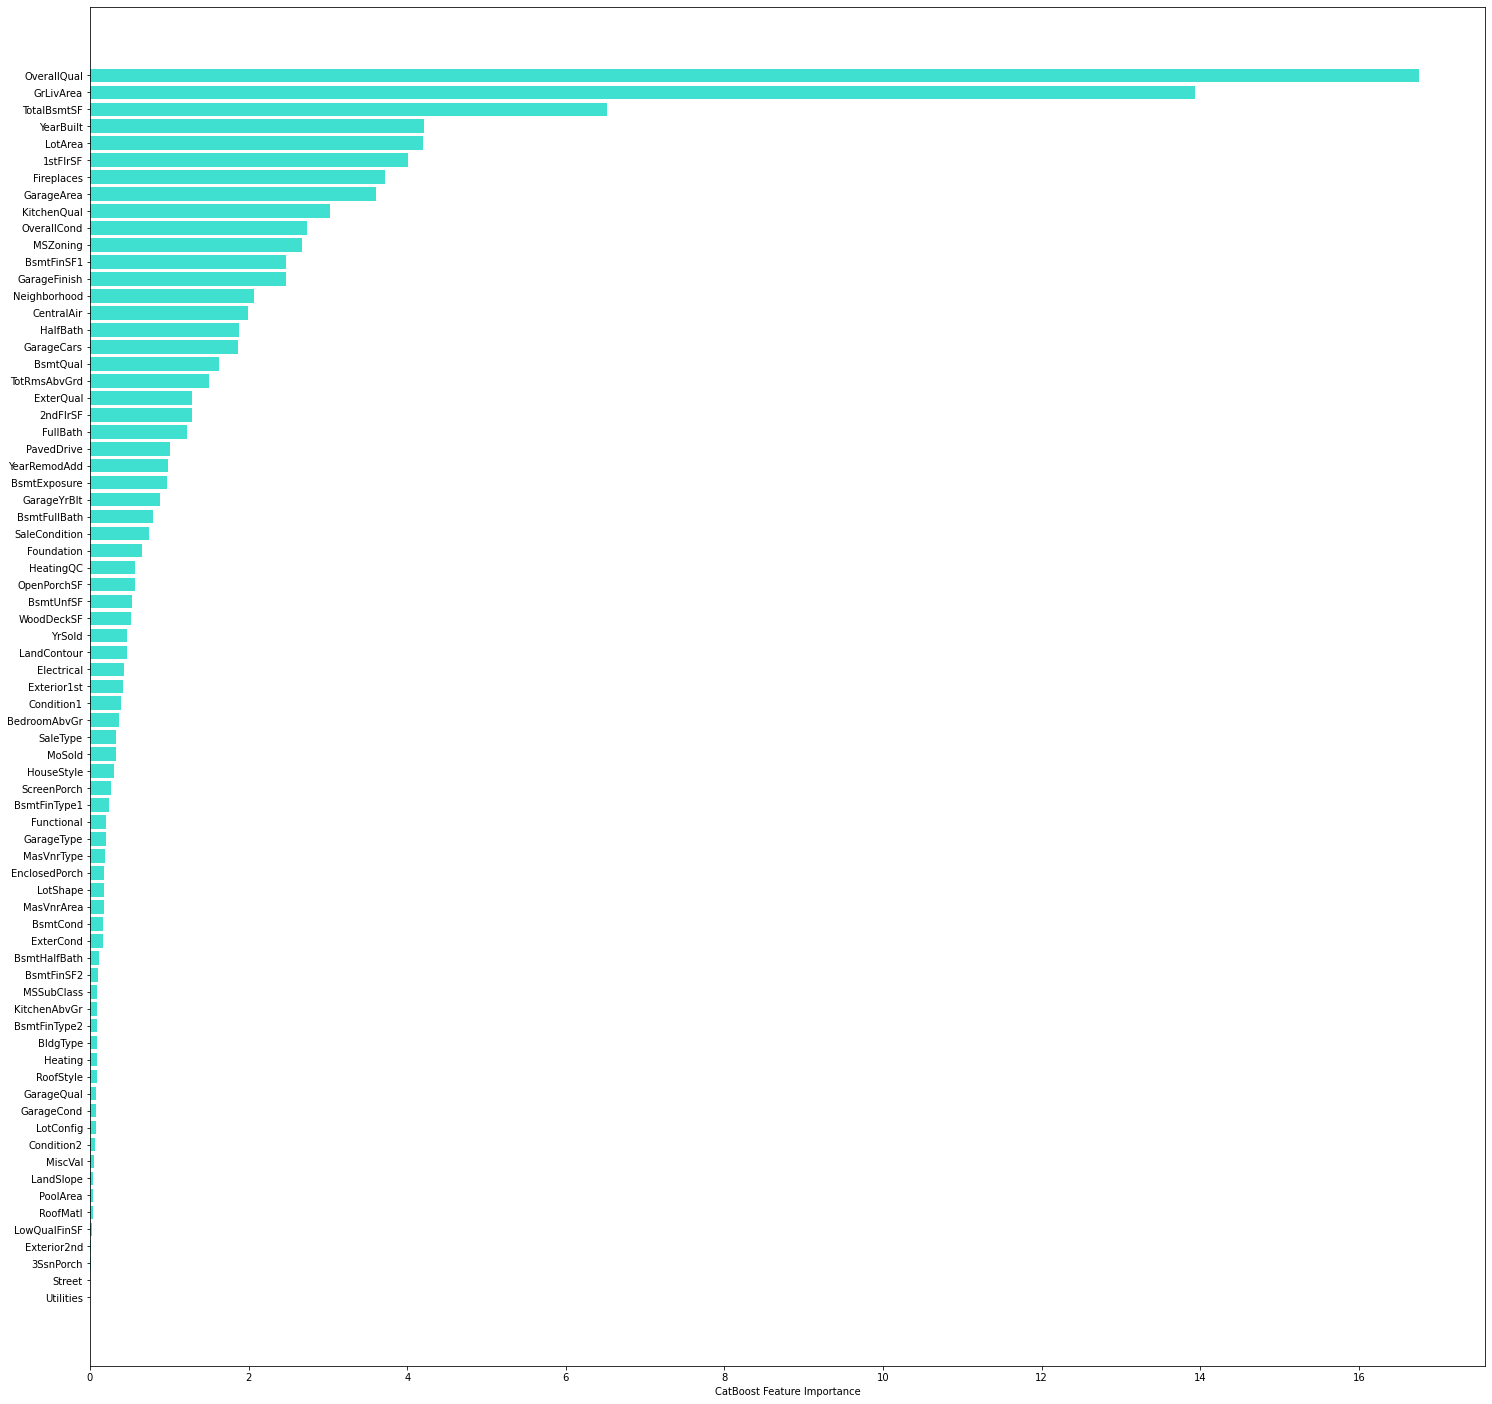

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(25,25))
plt.barh(data.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
from catboost import  Pool, metrics, cv
import catboost as cb

In [ ]:
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_val, y_val, cat_features=categorical_features_indices)

In [ ]:
model = CatBoostRegressor(loss_function='RMSE')

In [ ]:
grid = {'iterations': [1500,1550,1600],
        'learning_rate': [0.03],
        'depth': [6],
        'l2_leaf_reg': [0.5],
        'logging_level':['Silent'],
        #,'task_type':['GPU']  
        #,
        }

In [ ]:
grid = GridSearchCV(estimator=model, param_grid = grid, cv = 5, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train,cat_features = categorical_features_indices)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9054847080719541

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 0.5, 'learning_rate': 0.03, 'logging_level': 'Silent'}
